In [1]:
from google.colab import drive
drive.mount('/content/drive')

/content/drive/Othercomputers/O meu portátil/202526_novaims/dm/project/data/DM_AIAI_CustomerDB.csv

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import math

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_seq_items', None)

In [4]:
CustomerDB = pd.read_csv('/content/drive/Othercomputers/O meu portátil/202526_novaims/dm/project/data/DM_AIAI_CustomerDB.csv')


# CustomerDB = pd.read_csv('../data/DM_AIAI_CustomerDB.csv')
# MetaData = pd.read_csv('../data/DM_AIAI_Metadata.csv')

## 2. Data Understanding

# 2.1 CustomerDB

In [5]:
CustomerDB.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [6]:
CustomerDB = CustomerDB.drop(columns=['Unnamed: 0'])

In [7]:
CustomerDB.tail()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16916,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
16917,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
16918,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard
16919,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,B1Z 8T3,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard
16920,100016,Emma,Martin,Emma Martin,Canada,British Columbia,Dawson Creek,55.720562,-120.160090,M4A 1E4,female,Master,Suburban,NaN,Single,Star,7/21/2020,7/21/2020,NaN,Standard


In [8]:
CustomerDB.columns

Index(['Loyalty#', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

In [9]:
CustomerDB.shape

(16921, 20)

In [10]:
CustomerDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status        

In [11]:
CustomerDB.dtypes

,0
Loyalty#,int64
First Name,object
Last Name,object
Customer Name,object
Country,object
Province or State,object
City,object
Latitude,float64
Longitude,float64
Postal code,object


The types of the following features should be:
- **'EnrollmentDateOpening'**: datetime64
- **'CancellationDate'**: datetime64

This will be addressed in the Data Types section to ensure proper handling for filtering, comparison, and time-based analysis.


In [12]:
CustomerDB.nunique()

,0
Loyalty#,16757
First Name,4941
Last Name,15404
Customer Name,16921
Country,1
Province or State,11
City,29
Latitude,49
Longitude,49
Postal code,75


In [13]:
CustomerDB.nunique()==1

,0
Loyalty#,False
First Name,False
Last Name,False
Customer Name,False
Country,True
Province or State,False
City,False
Latitude,False
Longitude,False
Postal code,False


The feature 'Country' has 1 unique value, so in section... I will delete them.

In [14]:
CustomerDB.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,16921.0,NaN,NaN,NaN,550197.393771,259251.503597,100011.0,326823.0,550896.0,772438.0,999999.0
First Name,16921,4941,Stacey,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,16921,15404,Salberg,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,16921,16921,Emma Martin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,16921,1,Canada,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province or State,16921,11,Ontario,5468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16921,29,Toronto,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,16921.0,NaN,NaN,NaN,47.1745,3.307971,42.984924,44.231171,46.087818,49.28273,60.721188
Longitude,16921.0,NaN,NaN,NaN,-91.814768,22.242429,-135.05684,-120.23766,-79.383186,-74.596184,-52.712578
Postal code,16921,75,V6E 3D9,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN


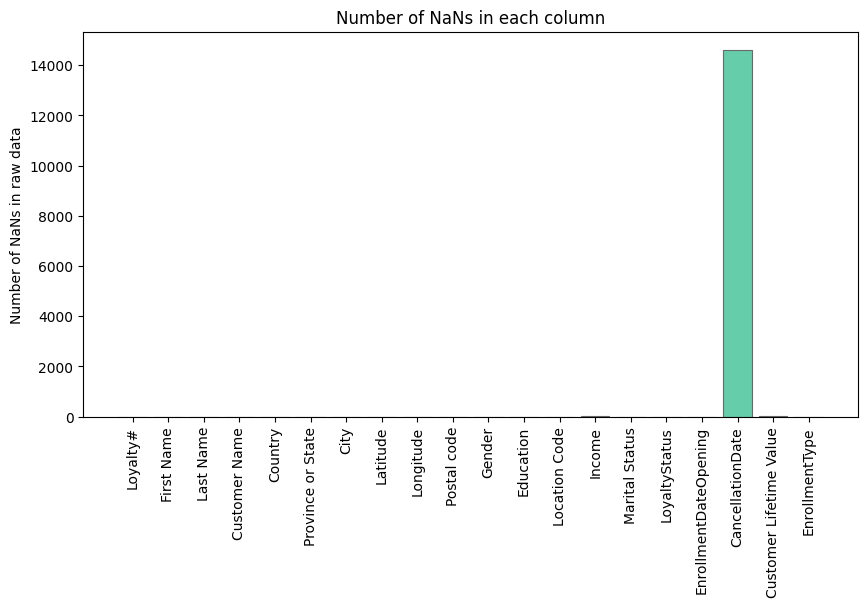

In [15]:
number_of_nans = CustomerDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

In [16]:
# Total rows
total_rows = CustomerDB.shape[0]

# Count of NaNs per column
nan_count = CustomerDB.isna().sum()

# Percentage of NaNs per column
nan_percentage = (nan_count / total_rows) * 100

# Display
nan_percentage


,0
Loyalty#,0.000000
First Name,0.000000
Last Name,0.000000
Customer Name,0.000000
Country,0.000000
Province or State,0.000000
City,0.000000
Latitude,0.000000
Longitude,0.000000
Postal code,0.000000


## Duplicated values in the Primary Key
by the shape of the dataset the primary key should be Loyalty#, as such every value in this column should be unique

In [17]:
primary_key = 'Loyalty#'
unique_values = CustomerDB[primary_key].unique().shape
n_rows = CustomerDB[primary_key].shape [0]
if unique_values != n_rows:
    print('oh no! there are repetitions!')
else:
    print("all good! no repetitions!")

oh no! there are repetitions!


In [18]:
# Select all rows with duplicated Loyalty#
duplicated_loyalty = CustomerDB[CustomerDB['Loyalty#'].duplicated(keep=False)]

# Sort by Loyalty# and EnrollmentDateOpening
duplicated_loyalty_sorted = duplicated_loyalty.sort_values(by=['Loyalty#', 'EnrollmentDateOpening'])

# Display the result
duplicated_loyalty_sorted

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
1646,101902,Hans,Schlottmann,Hans Schlottmann,Canada,Ontario,London,42.984924,-81.245277,M5B 3E4,female,College,Rural,0.0,Married,Aurora,1/7/2020,NaN,6265.34,Standard
2668,101902,Yi,Nesti,Yi Nesti,Canada,Ontario,Toronto,43.653225,-79.383186,M8Y 4K8,female,Bachelor,Urban,79090.0,Married,Aurora,3/19/2020,NaN,8609.16,Standard
700,106001,Ivette,Peifer,Ivette Peifer,Canada,Quebec,Montreal,45.501690,-73.567253,H2Y 4R4,female,High School or Below,Suburban,10037.0,Single,Star,1/11/2016,NaN,4914.04,Standard
15988,106001,Maudie,Hyland,Maudie Hyland,Canada,New Brunswick,Fredericton,45.963589,-66.643112,E3B 2H2,female,Master,Suburban,14973.0,Divorced,Star,7/16/2015,NaN,12168.74,Standard
9413,106509,Ardelia,Whitehorse,Ardelia Whitehorse,Canada,Ontario,Toronto,43.653225,-79.383186,M8Y 4K8,male,Bachelor,Rural,30915.0,Married,Nova,4/25/2020,10/7/2021,16727.77,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,989528,Sharri,Boughman,Sharri Boughman,Canada,Quebec,Montreal,45.501690,-73.567253,H2T 2J6,female,College,Rural,0.0,Divorced,Nova,5/1/2020,NaN,3370.07,Standard
9890,990512,Magda,Sopher,Magda Sopher,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,10/21/2018,NaN,1904.00,Standard
14478,990512,Ione,Snowden,Ione Snowden,Canada,British Columbia,Vancouver,49.282730,-123.120740,V5R 1W3,female,College,Urban,0.0,Single,Star,8/20/2021,NaN,6870.61,Standard
16380,992168,Crysta,Bennin,Crysta Bennin,Canada,Ontario,Ottawa,45.421532,-75.697189,K1F 2R2,female,Master,Urban,22828.0,Married,Star,12/18/2017,NaN,16473.17,Standard


In [ ]:
# Find duplicated combinations
duplicates = CustomerDB.groupby(['Loyalty#', 'EnrollmentDateOpening']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

print("Duplicated combinations:")
print(duplicates)

Duplicated combinations:
Empty DataFrame
Columns: [Loyalty#, EnrollmentDateOpening, count]
Index: []


In [ ]:
# Count occurrences of each Loyalty#
loyalty_counts = CustomerDB['Loyalty#'].value_counts()

# Filter Loyalty# that appear more than 3 times
loyalty_repeated = loyalty_counts[loyalty_counts > 3]

print("Loyalty# appearing more than 3 times:")
print(loyalty_repeated)

Loyalty# appearing more than 3 times:
Series([], Name: count, dtype: int64)


Currently, we do not have any fully duplicated rows in the dataset, so there is no need to remove anything at this stage.

Although some Loyalty# IDs appear more than once, the rows themselves are different. These cases will be handled later, because even though the ID is the same, the customer names are different.

## Data Types
We are going to change the data types of the following features to datetime:

EnrollmentDateOpening

CancellationDate

In [ ]:
datetime = ['EnrollmentDateOpening', 'CancellationDate']
for col in datetime:
    print(f'{col}: {CustomerDB[col].unique()}')

EnrollmentDateOpening: ['2/15/2019' '3/9/2019' '7/14/2017' ... '4/12/2015' '5/4/2018' '1/27/2015']
CancellationDate: [nan '1/8/2021' '1/2/2021' ... '5/1/2017' '2/27/2019' '9/20/2017']


In [ ]:
# Convert both columns to datetime
CustomerDB['EnrollmentDateOpening'] = pd.to_datetime(
    CustomerDB['EnrollmentDateOpening'], errors='coerce'
)
CustomerDB['CancellationDate'] = pd.to_datetime(
    CustomerDB['CancellationDate'], errors='coerce'
)

## Cancellation Date
Let's take into account this feature since we have 86% of missing values

In [ ]:
# Get unique values
unique_cd = CustomerDB['CancellationDate'].dropna().unique()
# Sort them
unique_cd_sorted = np.sort(unique_cd)
print(unique_cd_sorted)

['2015-01-27T00:00:00.000000000' '2015-09-12T00:00:00.000000000'
 '2015-11-30T00:00:00.000000000' ... '2021-12-28T00:00:00.000000000'
 '2021-12-29T00:00:00.000000000' '2021-12-30T00:00:00.000000000']


## Categorical Features

In [ ]:
non_numerical_columns = CustomerDB.select_dtypes(include=['object']).columns.tolist()

numerical_columns = CustomerDB.select_dtypes(include=['number']).columns.tolist()

In [ ]:
for col in non_numerical_columns:
    print(f'{col}: {CustomerDB[col].unique()}')

First Name: ['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']
Last Name: ['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']
Customer Name: ['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']
Country: ['Canada']
Province or State: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
City: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown']
Postal code: ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E1A 2A7' 'E3B 2H2' 'M1R 4K

## Gender

In [ ]:
CustomerDB['Gender'] = CustomerDB['Gender'].str.capitalize()

## Postal Code

In [ ]:
# Canadian postal code format: A1A 1A1
pattern = r'^[A-Z]\d[A-Z] \d[A-Z]\d$'

# Check format validity
CustomerDB['ValidPostalCode'] = CustomerDB['Postal code'].str.match(pattern)

# Filter invalid postal codes
invalid_postal = CustomerDB[~CustomerDB['ValidPostalCode']]

# Show unique invalid postal codes with province/state and loyalty ID
unique_invalid = invalid_postal[['Postal code', 'Province or State']].drop_duplicates()

print(unique_invalid)



    Postal code Province or State
73      V10 6T5  British Columbia
110     V09 2E9  British Columbia


## First Name, Last Name and Customer Name

In [ ]:
# Clean spaces
CustomerDB['First Name'] = CustomerDB['First Name'].str.strip()
CustomerDB['Last Name'] = CustomerDB['Last Name'].str.strip()
CustomerDB['Customer Name'] = CustomerDB['Customer Name'].str.strip()

# Updated pattern (allows accents, hyphens, apostrophes, spaces)
pattern = r'^[A-Z][A-Za-zÀ-ÿ\' -]*$'

invalid_names = CustomerDB[
    ~CustomerDB['First Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Last Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Customer Name'].fillna('').str.match(pattern)
]

print(invalid_names[['Loyalty#', 'First Name', 'Last Name', 'Customer Name']].drop_duplicates())


Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name]
Index: []


## Histograms

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


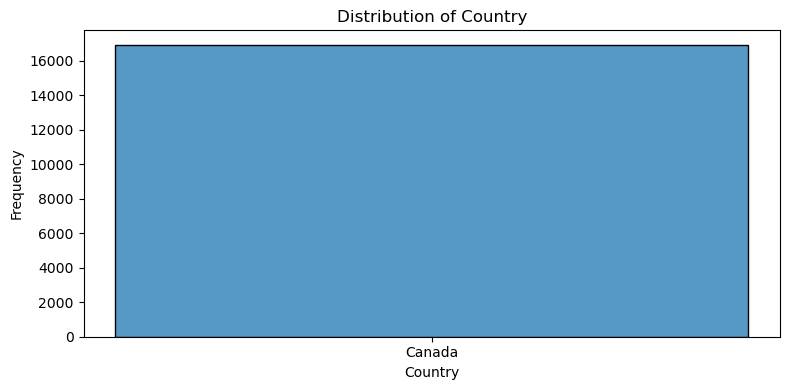

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


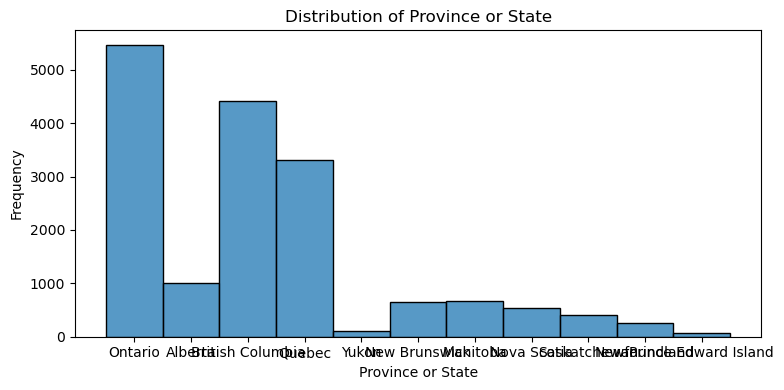

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


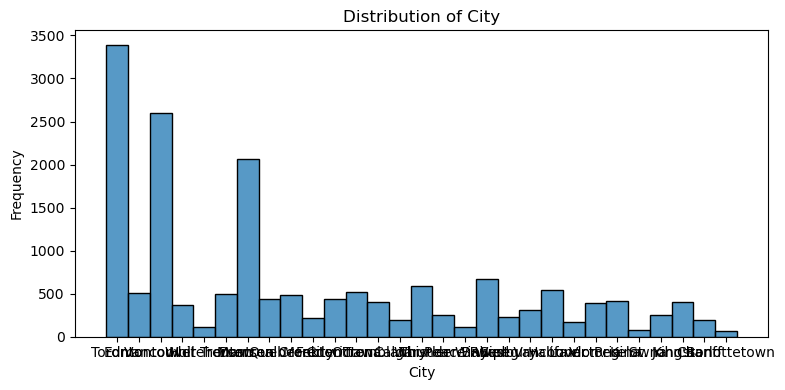

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


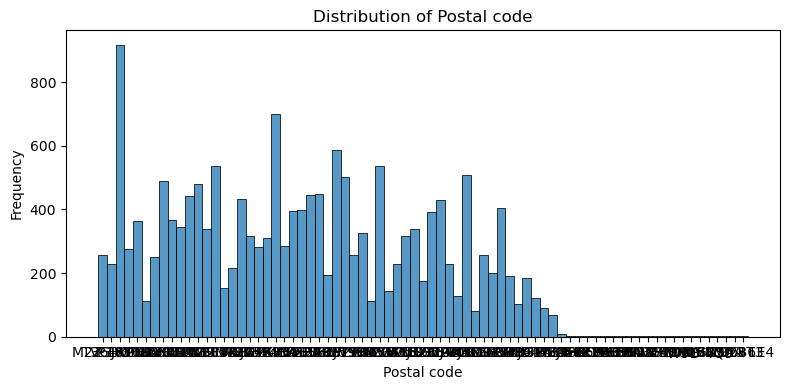

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


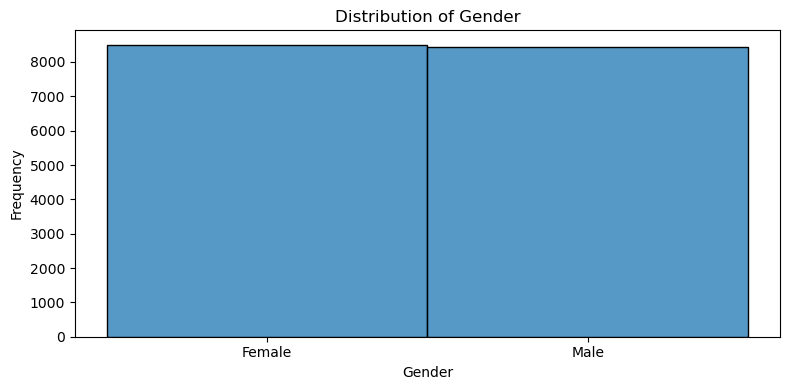

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


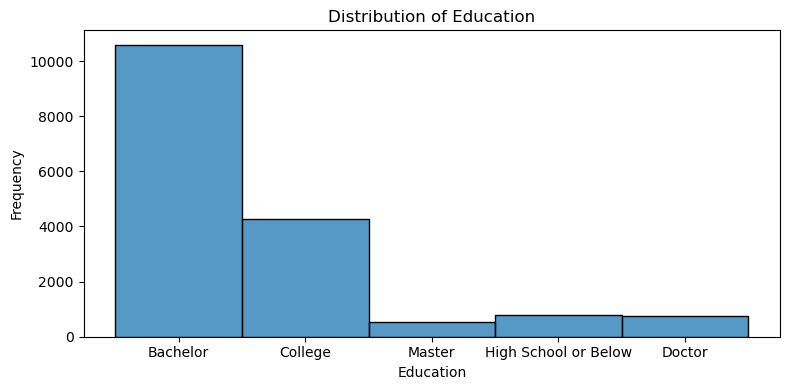

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


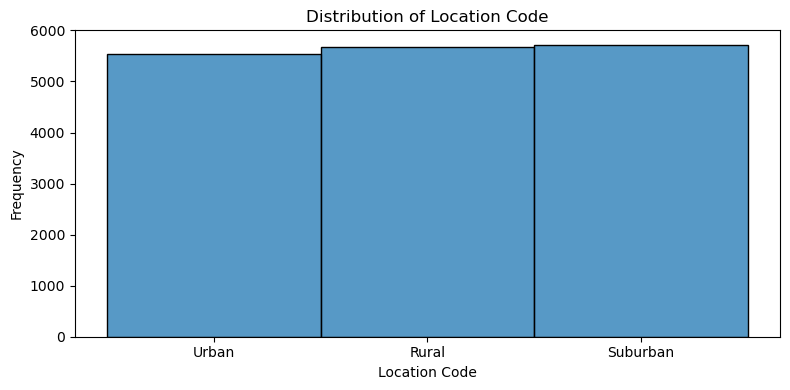

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


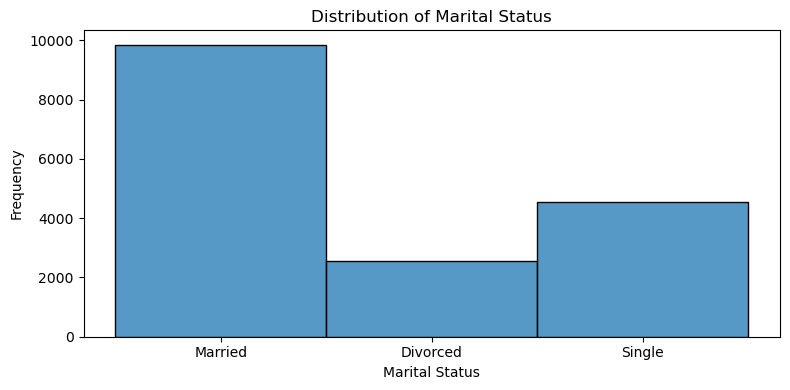

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


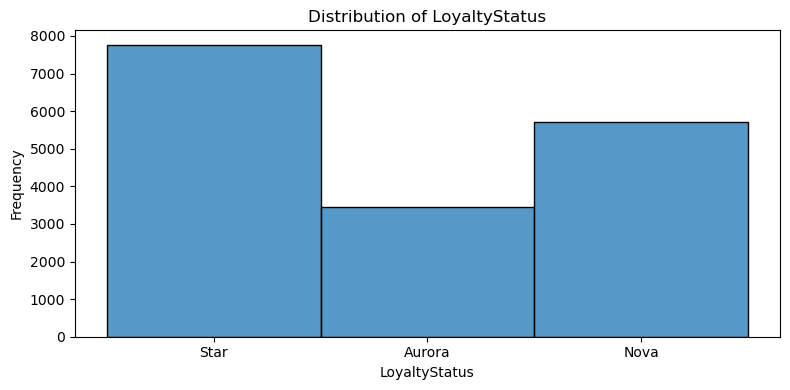

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


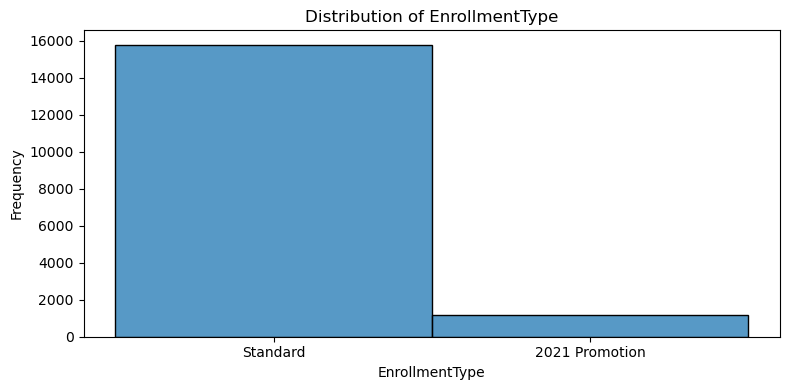

In [ ]:
# Exclude multiple columns properly
exclude_cols = ['Loyalty#', 'First Name', 'Customer Name', 'Last Name', 'Postal Code']
num_cols_to_plot = [col for col in non_numerical_columns if col not in exclude_cols]

CustomerDB[num_cols_to_plot] = CustomerDB[num_cols_to_plot]


# Plot histograms
for col in num_cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(CustomerDB[col].dropna(), bins=15)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()



Some conclusions we can take from the histograms: <b>
**Country**: No variation, 1 unique value
**Gender**:
**Education**: Bachelor...


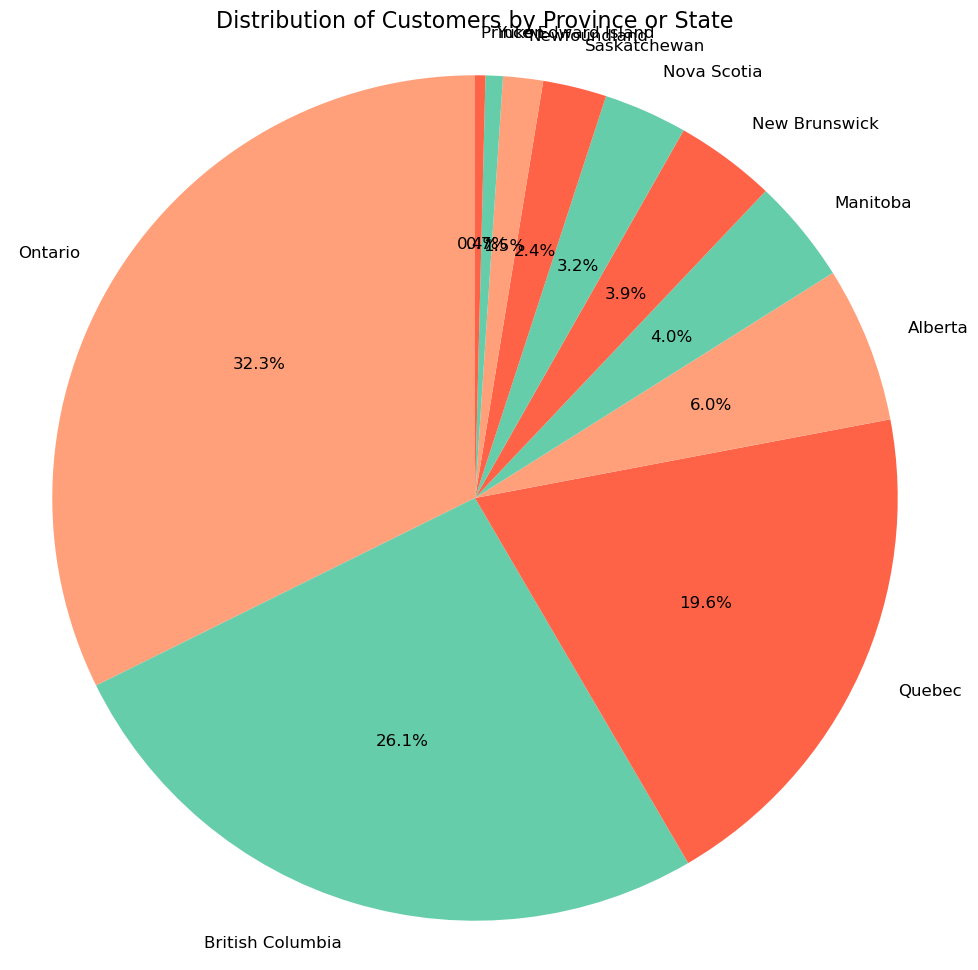

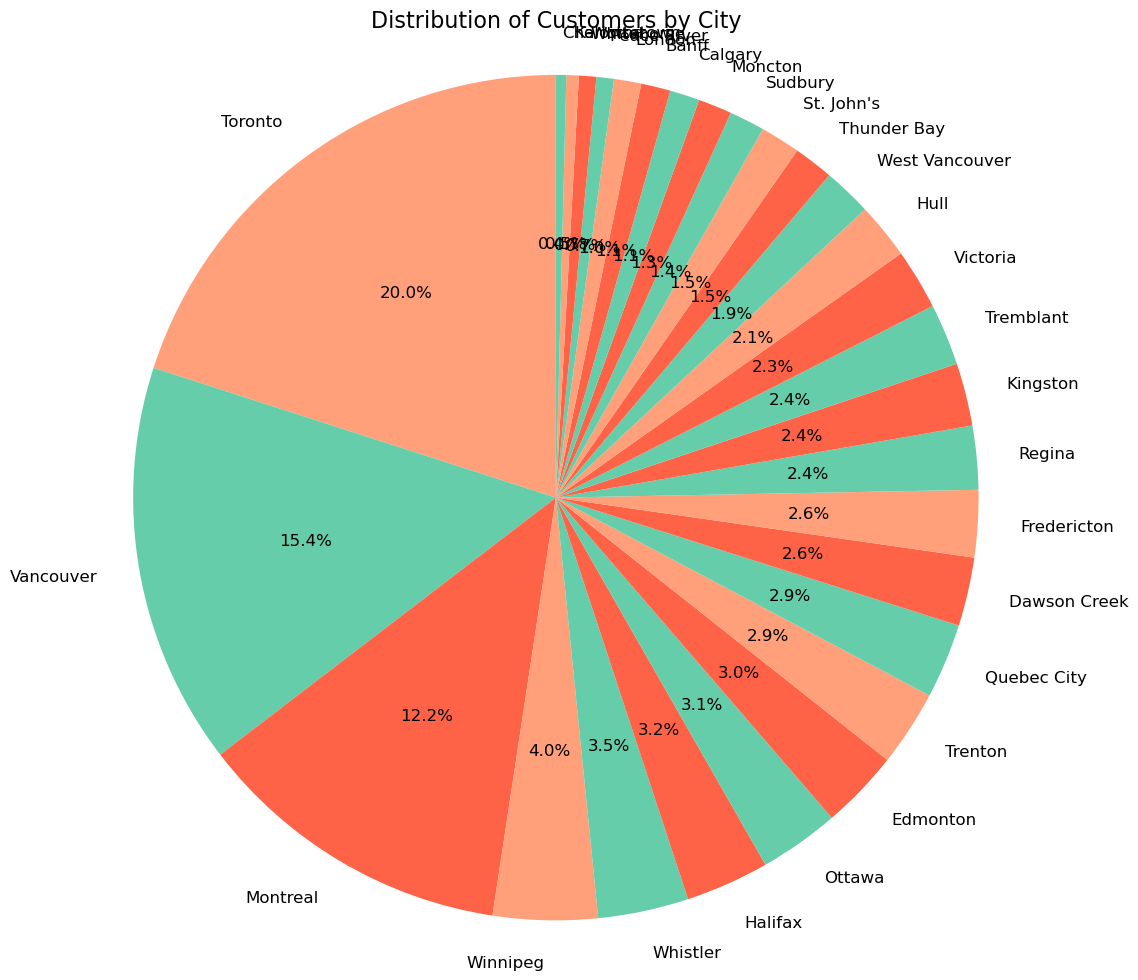

In [ ]:
columns_to_plot = ['Province or State', 'City']

colors = ['lightsalmon', 'mediumaquamarine', 'tomato','lightsalmon',
          'mediumaquamarine','tomato', 'mediumaquamarine', 'tomato']

for col in columns_to_plot:
    counts = CustomerDB[col].value_counts()

    plt.figure(figsize=(12, 12))
    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)],  # Use only as many colors as needed
        textprops={'fontsize': 12}
    )
    plt.title(f'Distribution of Customers by {col}', fontsize=16)
    plt.axis('equal')
    plt.show()


## Bivariate Analysis

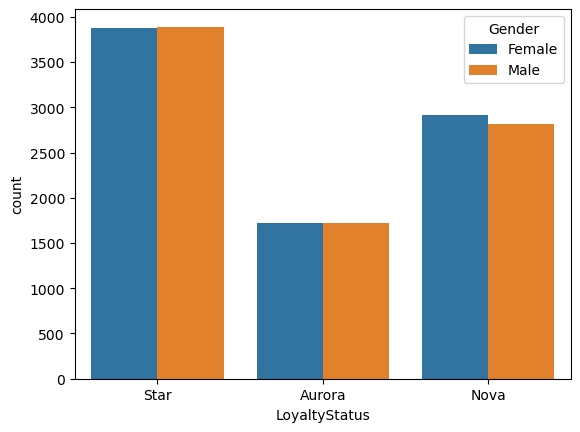

In [ ]:
# sns.countplot does not have stackd option
sns.countplot(CustomerDB, x="LoyaltyStatus", hue="Gender")

plt.show()

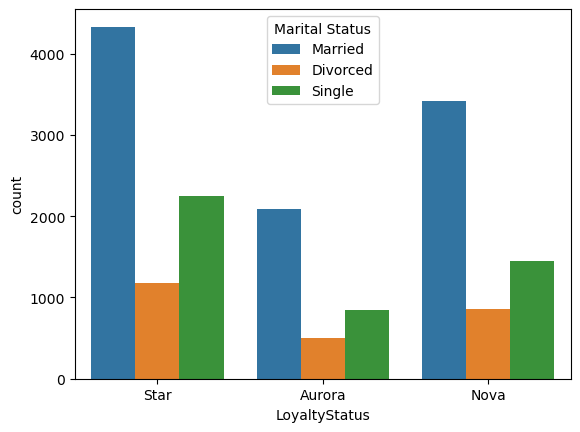

In [ ]:
# sns.countplot does not have stacked option
sns.countplot(CustomerDB, x="LoyaltyStatus", hue="Marital Status")

plt.show()

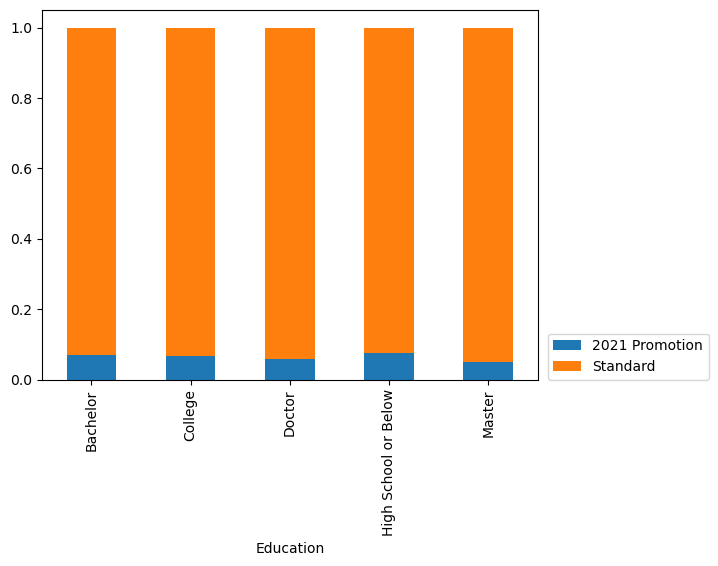

In [ ]:
pd.crosstab(CustomerDB['Education'], CustomerDB['EnrollmentType'], normalize='index').plot.bar(stacked=True)
plt.legend(loc=(1.02,0)) # reposition legend on right subplot
plt.show()

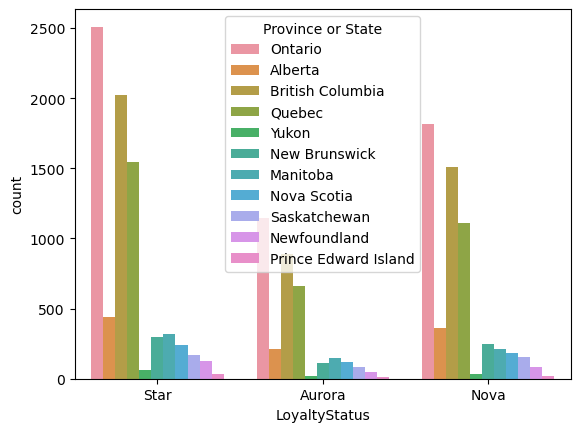

In [ ]:
# sns.countplot does not have stacked option
sns.countplot(CustomerDB, x="LoyaltyStatus", hue="Province or State")

plt.show()

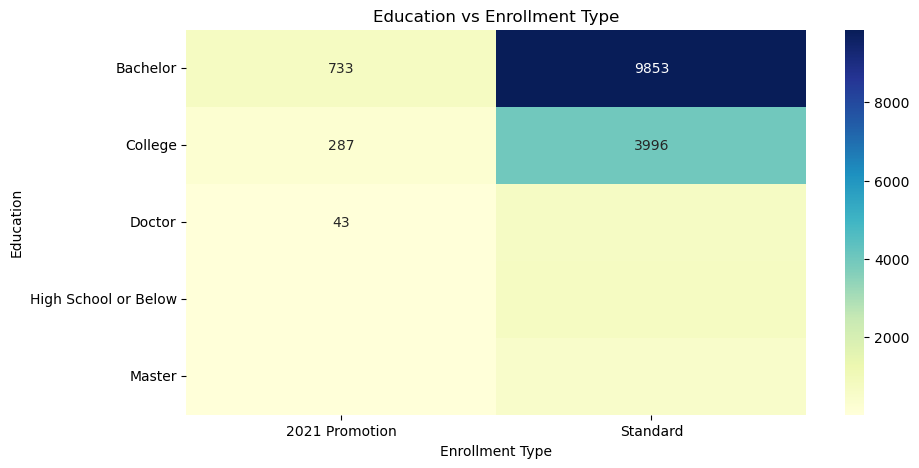

In [ ]:

# Crosstab with counts
ct = pd.crosstab(CustomerDB['Education'], CustomerDB['EnrollmentType'])

plt.figure(figsize=(10,5))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Education vs Enrollment Type')
plt.ylabel('Education')
plt.xlabel('Enrollment Type')
plt.show()


## Numerical Features

In [ ]:
for col in numerical_columns:
    print(f'{col}: {CustomerDB[col].unique()}')

Loyalty#: [480934 549612 429460 ... 100014 100015 100016]
Latitude: [43.653225 53.544388 49.28273  45.42873  60.721188 44.101128 45.50169
 55.759628 46.813877 46.087818 45.963589 45.421532 46.118462 51.048615
 50.116322 48.380894 56.23418  49.895138 46.522099 49.328625 44.648766
 42.984924 48.428421 50.44521  49.887951 47.561508 44.231171 51.178398
 46.238239 46.029263 45.573672 44.075379 46.106617 45.95     43.706878
 55.701475 45.365906 45.471557 43.690489 46.067243 46.749897 53.549353
 55.751178 43.593187 46.759733 53.524829 46.051866 46.86297  55.720562]
Longitude: [ -79.383186 -113.49093  -123.12074   -75.713364 -135.05684   -77.576309
  -73.567253 -120.23766   -71.207977  -64.778229  -66.643112  -75.697189
  -74.596184 -114.07085  -122.95736   -89.247681 -117.28938   -97.138374
  -80.953033 -123.16019   -63.575237  -81.245277 -123.36565  -104.6189
 -119.49601   -52.712578  -76.485954 -115.5708    -63.131069  -66.56515
  -73.523012  -77.550375  -64.714267  -66.652437  -79.437412 -

In [ ]:
numerical_cols = ['Loyalty#', 'Latitude', 'Longitude', 'Income', 'Customer Lifetime Value']

# Define expected ranges for each column
rules = {
    'Loyalty#': lambda x: x >= 0,
    'Latitude': lambda x: (x >= -90) & (x <= 90),
    'Longitude': lambda x: (x >= -180) & (x <= 180),
    'Income': lambda x: x >= 0,
    'Customer Lifetime Value': lambda x: x >= 0
}

# Check each column
for col in numerical_cols:
    invalid_rows = CustomerDB[~rules[col](CustomerDB[col])]
    print(f"--- {col} ---")
    if invalid_rows.empty:
        print("All values are consistent ✅\n")
    else:
        print(f"Inconsistent values found ({len(invalid_rows)} rows):")
        print(invalid_rows[[col]])
        print("\n")


--- Loyalty# ---
All values are consistent ✅

--- Latitude ---
All values are consistent ✅

--- Longitude ---
All values are consistent ✅

--- Income ---
Inconsistent values found (20 rows):
       Income
16901     NaN
16902     NaN
16903     NaN
16904     NaN
16905     NaN
16906     NaN
16907     NaN
16908     NaN
16909     NaN
16910     NaN
16911     NaN
16912     NaN
16913     NaN
16914     NaN
16915     NaN
16916     NaN
16917     NaN
16918     NaN
16919     NaN
16920     NaN


--- Customer Lifetime Value ---
Inconsistent values found (20 rows):
       Customer Lifetime Value
16901                      NaN
16902                      NaN
16903                      NaN
16904                      NaN
16905                      NaN
16906                      NaN
16907                      NaN
16908                      NaN
16909                      NaN
16910                      NaN
16911                      NaN
16912                      NaN
16913                      NaN
16914     

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

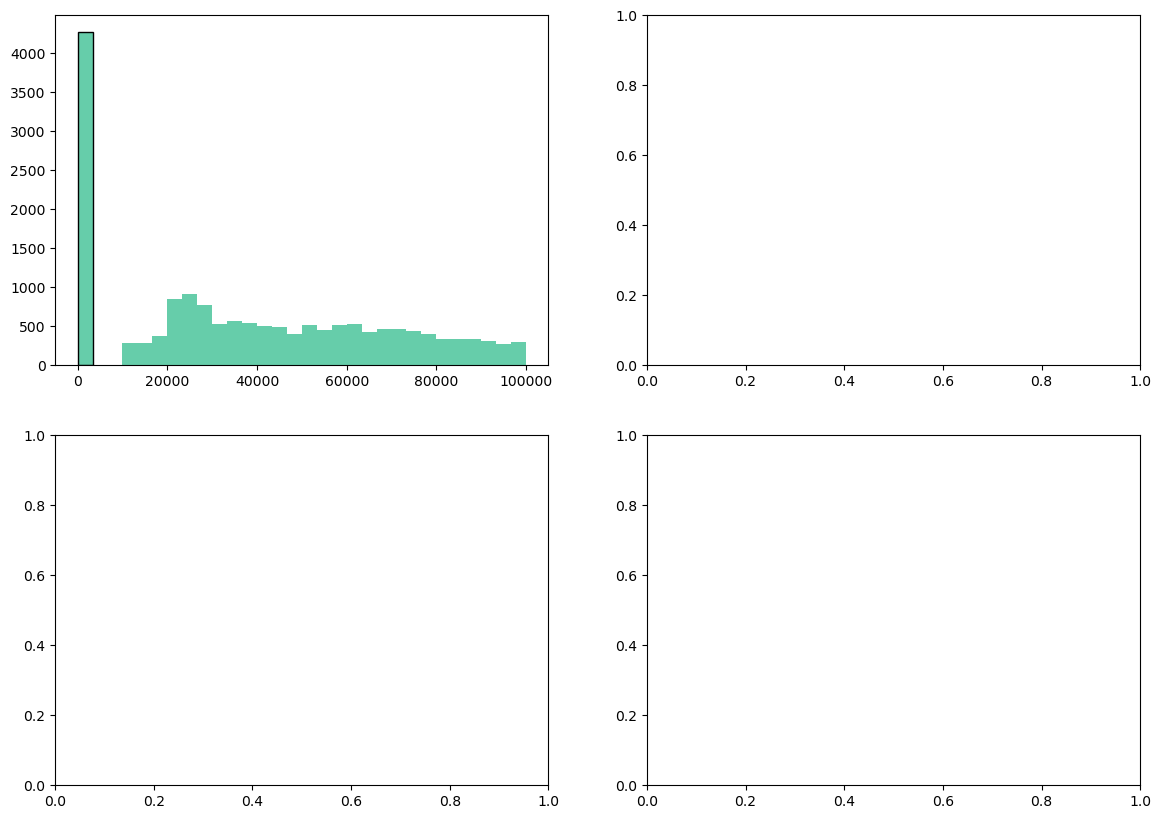

In [ ]:
# Select the two columns
cols = ['Income', 'Customer Lifetime Value']

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14,10))  # 2 rows, 2 columns

# Top row: Histograms
for i, col in enumerate(cols):
    axes[0, i].hist(CustomerDB[col].dropna(), bins=30, color='mediumaquamarine', edgecolor='black', kde=True)
    axes[0, i].set_title(f'{col} Distribution')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Count')

# Bottom row: Horizontal Boxplots
for i, col in enumerate(cols):
    axes[1, i].boxplot(CustomerDB[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightsalmon'))
    axes[1, i].set_title(f'{col} Boxplot')
    axes[1, i].set_xlabel(col)

plt.tight_layout()
plt.show()

## Income

In [ ]:
CustomerDB[CustomerDB['Income'].isna()].head(10)


## Consistence between features

'Enrollment Date' should be smaller than Cancellation Date, if this exists'
If there is a Cancellation Date, it should not exists Loyalty Status

In [ ]:
# Rows where CancellationDate is before EnrollmentDateOpening
invalid_dates = CustomerDB[
    (CustomerDB['CancellationDate'].notna()) &
    (CustomerDB['CancellationDate'] < CustomerDB['EnrollmentDateOpening'])
]

print("Rows with CancellationDate before EnrollmentDate:")
display(invalid_dates)

# Rows where CancellationDate exists but LoyaltyStatus is still active
invalid_status = CustomerDB[
    (CustomerDB['CancellationDate'].notna()) &
    (CustomerDB['LoyaltyStatus'].notna())
]

print("Rows with CancellationDate but still active LoyaltyStatus:")
display(invalid_status)


In [ ]:
# Create a full name from first and last name
CustomerDB['FullName'] = CustomerDB['First Name'].str.strip() + ' ' + CustomerDB['Last Name'].str.strip()

# Compare with Customer Name
name_inconsistencies = CustomerDB[CustomerDB['FullName'] != CustomerDB['Customer Name'].str.strip()]

# Display inconsistent rows
name_inconsistencies[['Loyalty#','First Name','Last Name','Customer Name','FullName']]

if name_inconsistencies.empty:
    print("All names are correct")
else:
    print("Please review this columns")


In [ ]:
# Create full name
CustomerDB['FullName'] = CustomerDB['First Name'].str.strip() + ' ' + CustomerDB['Last Name'].str.strip()

# Find duplicated names
duplicates_names = CustomerDB[CustomerDB.duplicated(subset='FullName', keep=False)]

# Sort for easier inspection
duplicates_names = duplicates_names.sort_values(by='FullName')

duplicates_names[['Loyalty#','First Name','Last Name','Customer Name','EnrollmentDateOpening']]


85% means that this persons did not left the program yet

## Duplicated Rows

In [ ]:
# Select all fully duplicate rows (all columns must match)
fully_duplicated_rows = CustomerDB[CustomerDB.duplicated(keep=False)]

# Display the fully duplicated rows
fully_duplicated_rows

In [ ]:
# Select all columns except 'Loyalty#'
cols_except_loyalty = [c for c in CustomerDB.columns if c != 'Loyalty#']

# Find duplicated rows ignoring 'Loyalty#'
duplicates_ignore_loyalty = CustomerDB[CustomerDB.duplicated(subset=cols_except_loyalty, keep=False)]

# Optional: sort for easier inspection
duplicates_ignore_loyalty = duplicates_ignore_loyalty.sort_values(by=['First Name','Last Name','EnrollmentDateOpening'])

# Display
duplicates_ignore_loyalty


In [ ]:
CustomerDB_clean = CustomerDB.to_csv('CustomerDB_clean.csv')